# 0. 설정

In [20]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers

import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def plot_loss(history):
    plt.plot(pd.DataFrame(history.history))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.legend(('loss', 'v_loss'))
    plt.show()


def plot_prediction(y_sample, y_pred):

    plt.figure(figsize=(15,3))
    plt.plot(y_sample, marker='o')
    plt.plot(y_pred, marker='o')
    plt.legend(('y true', 'y pred'))

# 8. 저장과 복원

## 8-1. 데이터 불러오기

In [21]:
housing = fetch_california_housing()

x_train, x_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=42)
print('* Org data info : ', x_train.shape)
print( x_train[0])

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print('\n* Transfored data info : ', x_train.shape)
print( x_train[0])

* Org data info :  (15480, 8)
[   4.2143       37.            5.28823529    0.97352941  860.
    2.52941176   33.81       -118.12      ]

* Transfored data info :  (15480, 8)
[ 0.17648852  0.66640687 -0.06085431 -0.2811182  -0.49654414 -0.04828325
 -0.8607415   0.73099911]


## 8-2. 모델 구성

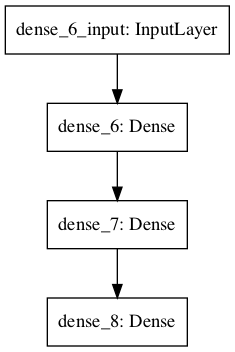

In [22]:
model = tf.keras.models.Sequential([
    layers.Dense(30, activation="relu", input_shape=[8]),
    layers.Dense(30, activation="relu"),
    layers.Dense(1)
])
plot_model(model)

## 8-3. 모델 컴파일

In [23]:
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(lr=1e-3))

## 8-4. 모델 평가

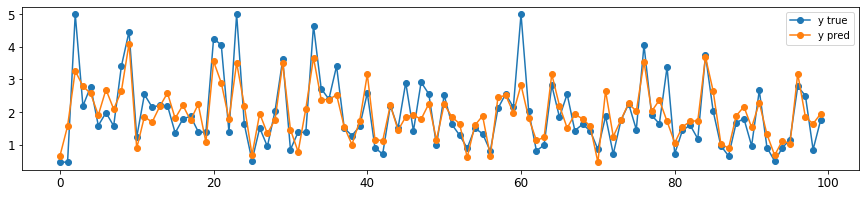

In [26]:
x_sample, y_sample = x_test[:100], y_test[:100]
y_pred = model.predict(x_sample)

plot_prediction(y_sample, y_pred)

## 8-5. 모델 학습

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 1s 42us/sample - loss: 2.2746 - val_loss: 1.3167
Epoch 2/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.8733 - val_loss: 0.7811
Epoch 3/30
12384/12384 [==============================] - 0s 29us/sample - loss: 0.7198 - val_loss: 0.7143
Epoch 4/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6699 - val_loss: 0.6730
Epoch 5/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6336 - val_loss: 0.6408
Epoch 6/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.6046 - val_loss: 0.6162
Epoch 7/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5808 - val_loss: 0.5936
Epoch 8/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5601 - val_loss: 0.5746
Epoch 9/30
12384/12384 [==============================] - 0s 28us/sample - loss: 0.5430 - val_l

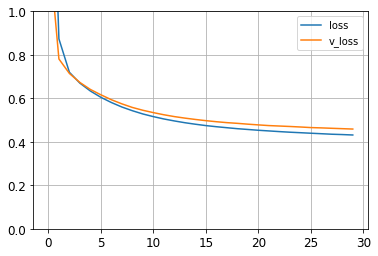

In [25]:
history = model.fit(x_train, y_train, epochs=30, validation_split=0.2)
plot_loss(history)

## 8-6. 모델 저장

In [27]:
model.save("my_keras_model.h5")

## 8-7. 모델 불러오기

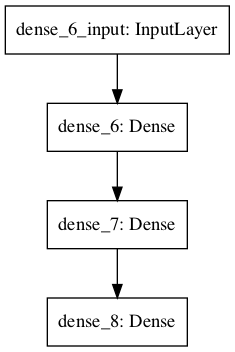

In [28]:
loaded_model = tf.keras.models.load_model("my_keras_model.h5")
plot_model(loaded_model)

## 8-8. 불러온 모델 평가

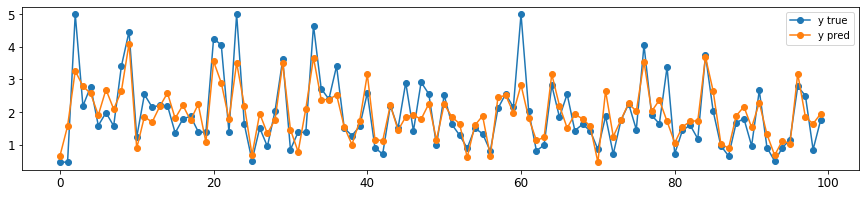

In [30]:
x_sample, y_sample = x_test[:100], y_test[:100]
###### get y_pred_loaded_model from loaded_model.
y_pred_loaded_model = loaded_model.predict(x_sample)
plot_prediction(y_sample, y_pred_loaded_model)

# 9. 훈련 과정에서 콜백 사용하기 - checkpoint, tensorboad

## 9-1. 콜백 선언하기

In [17]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("ckp_model.h5", save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard('logs')

## 9-2. 모델 학습하기

Train on 12384 samples, validate on 3096 samples
Epoch 1/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4296 - val_loss: 0.4567
Epoch 2/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4279 - val_loss: 0.4553
Epoch 3/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4260 - val_loss: 0.4537
Epoch 4/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4244 - val_loss: 0.4534
Epoch 5/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4230 - val_loss: 0.4507
Epoch 6/30
12384/12384 [==============================] - 0s 33us/sample - loss: 0.4215 - val_loss: 0.4496
Epoch 7/30
12384/12384 [==============================] - 0s 34us/sample - loss: 0.4197 - val_loss: 0.4487
Epoch 8/30
12384/12384 [==============================] - 0s 33us/sample - loss: 0.4183 - val_loss: 0.4471
Epoch 9/30
12384/12384 [==============================] - 0s 33us/sample - loss: 0.4169 - val_l

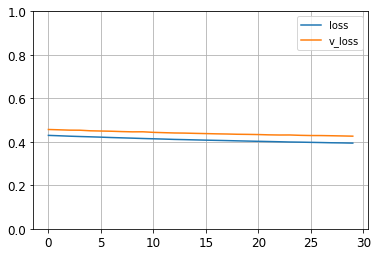

In [31]:
history = model.fit(x_train, y_train, epochs=30,
                    validation_split=0.2,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])
plot_loss(history)

## 9-3. 콜백으로 저장된 모델 불러오기

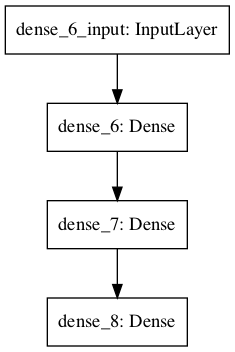

In [32]:
ckp_model = tf.keras.models.load_model("ckp_model.h5")
plot_model(ckp_model)

## 9-4. 불러온 모델 평가하기

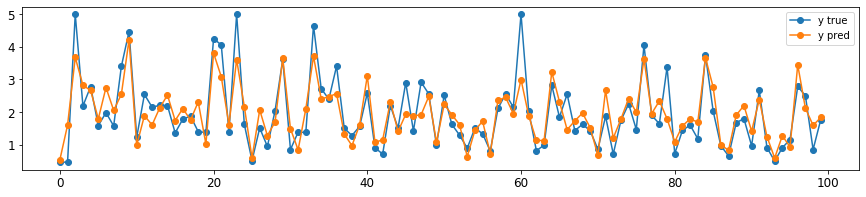

In [34]:
x_sample, y_sample = x_test[:100], y_test[:100]
###### get y_pred_loaded_model from loaded_model.
y_pred_ckp_model = ckp_model.predict(x_sample)
plot_prediction(y_sample, y_pred_ckp_model)

## 9-5. 텐서보드 실행


* 텐서보드 서버를 실행하는 한 가지 방법은 터미널에서 직접 실행하는 것입니다. 터미널을 열고 텐서보드가 설치된 가상 환경을 활성화합니다. 그다음 노트북 디렉토리로 이동하여 다음 명령을 입력하세요:
> tensorboard --logdir=./logs --port=6006